<a href="https://colab.research.google.com/github/lstarke/mlp_image_classifier_with_keras/blob/main/LeandroStarke_Building_an_Image_Classifier_using_the_Sequencial_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLP Image Classifier with Keras

This project was based on the example available inchapter 10 about introduction do Atificial Neural Networks with Keras from book "Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow"

<img src="https://drive.google.com/uc?export=view&
id=1S4idX1dz_KnEXyvZ1yvgEk32KtbHB5k8" width="50%"></p>



# Importing libraries

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

print(tf.__version__)

2.15.0


# Import the Fashion MNIST dataset and explore the data

Loading fashion MNIST dataset from Keras commom datasets

In [3]:
# returns tuple of NumPy arrays: (x_train, y_train), (x_test, y_test)
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


The fashion MNIST dataset is already shuffled and split into a training set (60,000 images) and a test set (10,000 images)

In [4]:
(X_train_full, y_train_full), ((X_test, y_test)) = fashion_mnist

print("Train shape: ", X_train_full.shape, y_train_full.shape)
print("Test shape: ", X_test.shape, y_test.shape)

Train shape:  (60000, 28, 28) (60000,)
Test shape:  (10000, 28, 28) (10000,)


The full dataset has 70,000 grayscale images (train+test) of 28 x 28 with pixel values ranging from 0 to 255 each, with 10 classes.

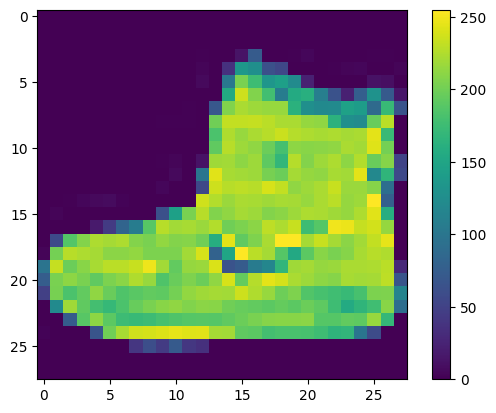

In [5]:
# plotting the first image with index 0
plt.figure()
plt.imshow(X_train_full[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
# the first image class name
print(y_train_full[0])

9


In [7]:
# unique class names
print(np.unique(y_train_full))

[0 1 2 3 4 5 6 7 8 9]


|Label|Class|
|---|---|
|0|T-shirt/top|
|1|Trouser|
|2|Pullover|
|3|Dress|
|4|Coat|
|5|Sandal|
|6|Shirt|
|7|Sneaker|
|8|Bag|
|9|Ankle boot|



In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

As we can see, the image above represents an Ankle boot (9)

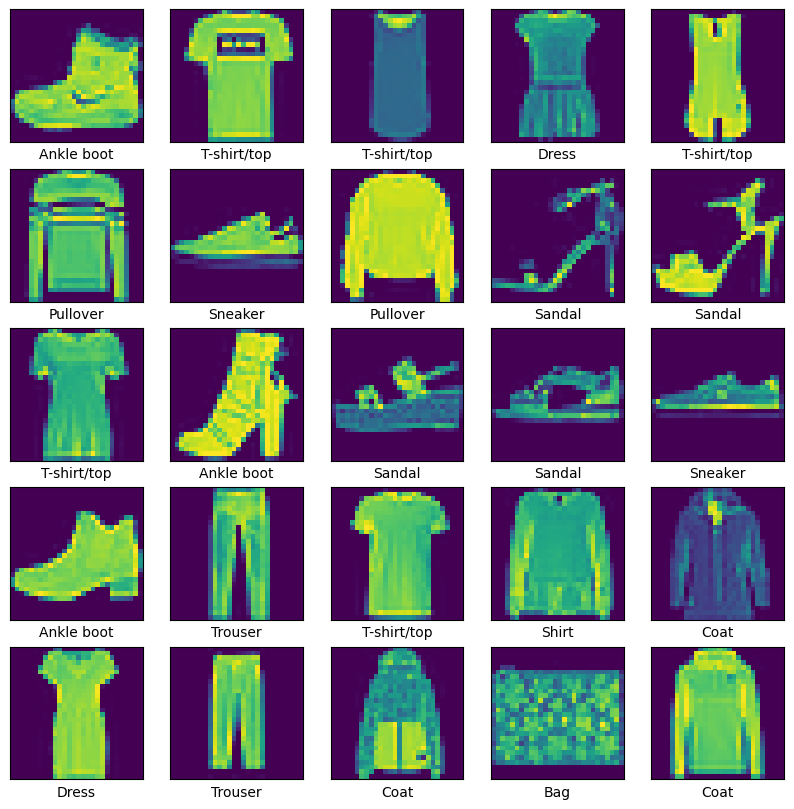

In [9]:
# displaying the first 25 images from the training dataset and class names
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train_full[i])
  plt.xlabel(class_names[y_train_full[i]])
plt.show()

# Splinting data into training and validation

In [10]:
# We'll hold out the last 5,000 images from the training set for validation
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]

# Using the last 5,000 images for validation
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_valid shape: {X_valid.shape}, y_valid shape: {y_valid.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (55000, 28, 28), y_train shape: (55000,)
X_valid shape: (5000, 28, 28), y_valid shape: (5000,)
X_test shape: (10000, 28, 28), y_test shape: (10000,)


After that we now have three main set for our model:

1. **X_train:** with 55,000 images for training the ANN;
2. **X_valid:** with 5,000 images to evaluating the model's performance during training;
3. **X_test:** with 10.000 images to provide an unbiased evaluation of the final model.

# Preprocess the data

Scaling the image pixels intensities down too the 0-1 range.

In [11]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255.,  X_test / 255.

The transformation above will also convert them to floats.

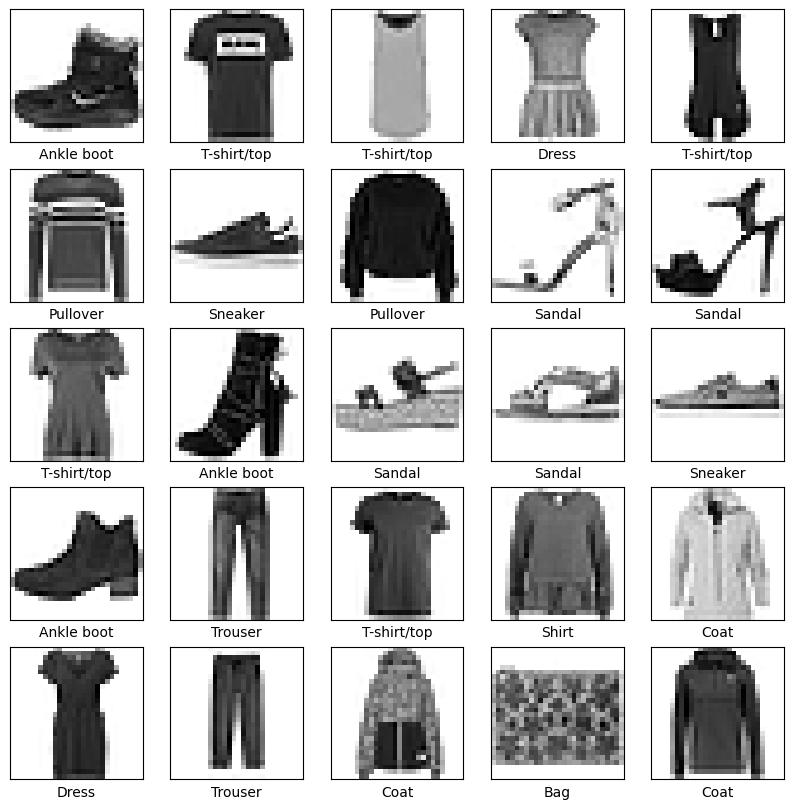

In [12]:
# displaying the first 25 images from the training dataset and class names
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])
plt.show()

# Creating the model using the sequencial API

> All global state managed by Keras is stores in a *Keras session*, wich you can clear using ```tf.keras.backend.clear_session()```. In particular, this resetsthe name counters.

In [13]:
tf.keras.backend.clear_session()

In [14]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

Let's go through this code line by line:

* First, set TensorFlow's random seed to make the results reproducible: the random weights of the hidden layers and the output layer will be the same every time you run the notebook. You could also choose to use the ``tf.keras.utils.set_random_seed()`` function, wich conveniently sets the random seeds for TensorFlow.

* The next line creates a Sequencialmodel. This is the simples kind of Keras model for neural networks that are just composed of a single stack of layers connected sequencially. This is called the sequencial API.

<p align=center>
<img src="https://drive.google.com/uc?export=view&id=12tcTZYN_6xRhdk6-LOlRli8uOf19y3Gp" width="70%"></p>

* Next, we built the first layer (an Input layer) and add it to the model. We specify the input shape, wich doesn't include the batch size, only the shape of the instances. Keras needs to know the shape of the inputs so it can determine the shae of the connection wight matrix of the first hidden layer.
If you do not specify the input shape, it's OK: Keras will simply wait util it knows the input shape before it actually builds some data (during training), or when you call its ``build()`` method. So, if you know the inputs shape when creating the model, it is best best to specify it.

* Then we add a ``Flatten`` layer. Its role is to convert each input image into a 1D array: for example, if it receives a batch of shape [32, 28, 28], it will reshape it to [32, 784]. In other words, if it receives input data X, it computes ``X.reshape(-1,784)``. This layer doesn't have any parameters, it's there to do some simple preprocessing.

* Next we add a ``Dense`` hidden layer with 300 neurons. It will use the ReLU activation function. Each ``Dense`` layer manages its own weight matrix, containing all te connection weights between the neurons and their inputs. It also manages a vector os a bias terms (one per neuron). When it receives some input data, it computes the equation bellow: $$h_{W, b}=\phi(XW+b)$$

* Then we add a second ``Dense`` hidden layer with 100 neurons, also using the ReLU activation function.

* Finally, we add a Dense output layer with 10 neurons (one per class), using the softmax activation function because the classes are exclusive.


## Model summary

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Model image

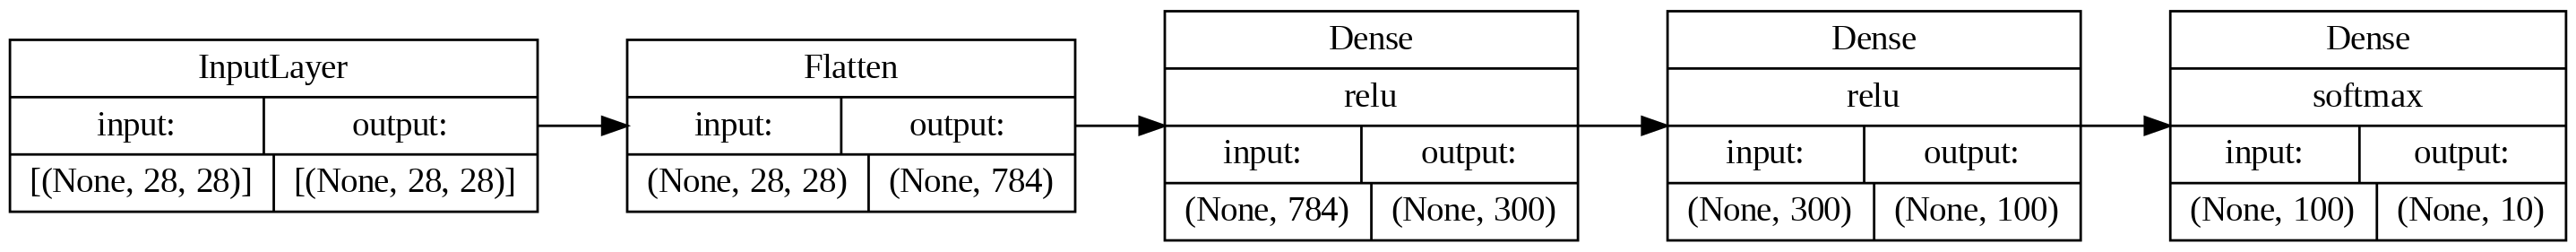

In [16]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=False,
    rankdir='LR',
    expand_nested=False,
    dpi=200,
    show_layer_activations=True,
    show_trainable=False
)

You can easily get the model's list of layers using the layers attribute, or use the ``get_layer()`` method to access a layer by name.

## Model layers

In [17]:
model.layers

In [18]:
hidden1 = model.layers[1]
print(hidden1.name)

dense


In [19]:
model.get_layer("dense") is hidden1

True

All the parameters of a layer can be accessed using its ``get_weights()`` and ``set_weights()`` methods. For a Dense layer, this includes both the connection weights and the bias terms:

In [20]:
weights, biases = hidden1.get_weights()
print(f"Weights:\n{weights}\n")
print(f"Weights.shape:{weights.shape}")

Weights:
[[ 0.03169134 -0.01138692  0.05210881 ... -0.06558546  0.0225866
   0.01751457]
 [-0.06163587  0.04150314  0.07025243 ... -0.00692477 -0.04641297
   0.01215   ]
 [-0.00702477  0.00997186  0.01804963 ...  0.02624363  0.07223323
  -0.01943439]
 ...
 [ 0.06519736 -0.05795005  0.07328688 ... -0.01188264 -0.01276467
   0.07164486]
 [ 0.05770904  0.03234185 -0.02132154 ...  0.02066603  0.04954651
   0.06369609]
 [ 0.05625707  0.05441837  0.01199345 ... -0.00374879 -0.02970901
  -0.02302583]]

Weights.shape:(784, 300)


In [21]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

> It is important to initialize all the hidden layers' connection weights randomly, or else training will fail. For example, if you initialize all weights and biases to zero, then all neurons in a given layer wil be perfectly identical, and thus backpropagation will affect them in exactly the same way, so they will remain identical. In other words, despite having hundreds of neurons per layer, you model will act as if had only one neuron per layer: it won't be too smart. If instead you randomly initialize the weights, you ***break the summetry*** and allow backpropagation to train a diverse team of neurons,

# Compiling the model

In [22]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This code requires explanation. The use of "sparse_ategorical_crossentropy" is because we have sparse labels.

In Machine Learning, "sparse labels" refers to class labels that are integers intead one-hot vectors.

**Example:**

* One-Hot Labels:
  * Class 0: ``[1, 0, 0]``
  * Class 1: ``[0, 1, 0]``
  * Class 2: ``[0, 0, 1]``

* Sparse Labels:
  * Class 0: ``0``
  * Class 1: ``1``
  * Class 2: ``1``

I instead we had class labels such as one-hot vectors, the we would need to use te "ategorical_crossentropy" loss instead. If we were doing binary classification or multilabel binary classification, then we would use the "sigmoid" activation function ins the output layer instead of the "softmax" activation function, and we would use the "binary_crossentropy" loss.

Regarding the optimizer, "sgd" means that we will train the model using stochastic gradient descent. In other words, Keras will perform the backpropagation algorithm.

Finally, it's useful to measure the accuracy of our model during the training and evaluation, wich is why we set ``metrics=["accuracy"]``.




# Training and evaluating the model

In [23]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
1719/1719 [==============================] - 10s 6ms/step - loss: 0.7151 - accuracy: 0.7672 - val_loss: 0.5027 - val_accuracy: 0.8262
Epoch 2/50
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4816 - accuracy: 0.8329 - val_loss: 0.4642 - val_accuracy: 0.8382
Epoch 3/50
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4371 - accuracy: 0.8463 - val_loss: 0.4231 - val_accuracy: 0.8520
Epoch 4/50
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4140 - accuracy: 0.8546 - val_loss: 0.3974 - val_accuracy: 0.8600
Epoch 5/50
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3946 - accuracy: 0.8619 - val_loss: 0.3935 - val_accuracy: 0.8644
Epoch 6/50
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3787 - accuracy: 0.8667 - val_loss: 0.4040 - val_accuracy: 0.8568
Epoch 7/50
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3662 - accuracy: 0.8707 - val_loss: 0.3758 - val_accura

We pass a validation set (this is otional). Keras will measure the loss and the extra metrics on this set at the end of each epoch, wich is very useful to see how well the model really performs.

The ```fit()``` method returns a History object containing the training parameters (```history.params```), the list of epochs it went throught (```history.epoch```), and the most importantly a dictionary (```history.history```) containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set (if any).

## Learning curves

In [24]:
history.history

{'loss': [0.715069055557251,
  0.4815804064273834,
  0.43707603216171265,
  0.41404861211776733,
  0.39457201957702637,
  0.37865087389945984,
  0.36622780561447144,
  0.354802668094635,
  0.3441206216812134,
  0.33416226506233215,
  0.3256208598613739,
  0.3175097703933716,
  0.31065118312835693,
  0.3035365045070648,
  0.2970619201660156,
  0.2904331386089325,
  0.2853344678878784,
  0.2791636288166046,
  0.2739905118942261,
  0.2694219946861267,
  0.2643636465072632,
  0.2590821385383606,
  0.25501495599746704,
  0.2500617802143097,
  0.24600164592266083,
  0.24225462973117828,
  0.23693719506263733,
  0.2344786822795868,
  0.22986257076263428,
  0.22668032348155975,
  0.2214500904083252,
  0.21968811750411987,
  0.21538831293582916,
  0.21184641122817993,
  0.2083631455898285,
  0.2055654674768448,
  0.20296548306941986,
  0.19890213012695312,
  0.1956382840871811,
  0.19209277629852295,
  0.18930457532405853,
  0.18685249984264374,
  0.18367943167686462,
  0.1809796392917633,
  0.

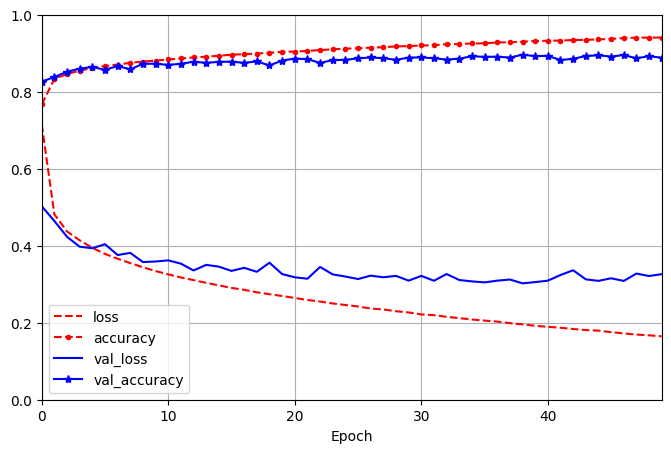

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8,5), xlim=[0,49], ylim=[0,1], grid=True, xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"])
plt.show()

* Both the training accuracy and the validation accuracy steadly increase durig the taining, while the training loss and validation lss decrease;
* The validation curves are relatively close to each other at first, but teu get further apart over time, wich shows that there's a little bit of overtitting.

# Evaluatig model on the test set

Before you deploy the model to production you should evaluate your model on the test set to estimate the generalization error.

In [26]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3468 - accuracy: 0.8828


[0.34682634472846985, 0.8827999830245972]

It''s common to get slightly lower performance on the test set than on the validation set, because te hyperparameters are tuned on the validation set, not the test set (however, in this example, we did not do any hyperparameter tuning, so the lower accuracy is just bad luck)

# Using the model to make predictions

In [27]:
X_new = X_test[:3]
y_proba = model.predict(X_new)

for x in y_proba.round(3):
  print(x)

1/1 [==============================] - 0s 142ms/step
[0.    0.    0.    0.    0.    0.001 0.    0.001 0.    0.998]
[0.    0.    0.987 0.    0.013 0.    0.    0.    0.    0.   ]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


For each instance the model estimates one probability per class, from class 0 to class 9. You can see that:

* For instance 1 the model predict with 99.8% that the class is (positon) 9.
* For instance 2 the model predict with 98.7% that the class is (positon) 2.
* For instance 3 the model predict with 100% that the class is (positon) 1.


In [28]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

I you only care about the class with the highest estimated probability (even if that probability is quite low), the you can use the ```argmax()``` method to get the highest probability class index for each instance.

In [29]:
y_pred = y_proba.argmax(axis=1)
y_pred

array([9, 2, 1])

In [36]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

# References

* [Basic classification: Classify images of clothing ](https://www.tensorflow.org/tutorials/keras/classification)
* [fashion_mnist.load_data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data)
*[Image Classification using Convolutional Neural Network with Python](https://www.analyticsvidhya.com/blog/2021/06/image-classification-using-convolutional-neural-network-with-python/)